# Ames House Data Exploration and Modelling

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#Read the cleaned csv's
train_df = pd.read_csv('train_df_clean.csv')
test_df = pd.read_csv('test_df_clean.csv')

In [3]:
#Check the shape of data
print("Train data shape:",train_df.shape)
print("Test data shape:",test_df.shape)

Train data shape: (2050, 71)
Test data shape: (879, 70)


In [4]:
pd.options.display.max_columns = None
display(train_df.head())
display(test_df.head())

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,SalePrice,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age
0,109,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,None,None,None,3,2010,WD,130500,0.0,3,1,44,34
1,544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,None,None,None,4,2009,WD,220000,1.0,3,1,74,13
2,153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,None,None,None,1,2010,WD,109000,1.0,1,1,52,57
3,318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,0,None,None,None,4,2010,WD,174000,0.0,3,1,100,4
4,255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,None,None,None,3,2010,WD,138500,0.0,2,1,59,110


,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age
0,2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,None,None,None,4,2006,WD,0,2,0,60.0,96
1,2718,90,RL,0.0,9662,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,TA,TA,Y,0,None,None,None,8,2006,WD,0,2,0,170.0,29
2,2414,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,0,None,None,None,9,2006,New,1,3,0,124.0,0
3,1989,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,968,968,GasA,TA,Y,SBrkr,968,0,0,968,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,None,None,None,7,2007,WD,0,1,0,0.0,84
4,625,20,RL,0.0,9500,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,None,None,None,7,2009,WD,1,2,0,261.0,46


In [5]:
#Drop these varaibles as they have less correlation with the saleprice and are consolidated
train_df = train_df.drop(['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature','Yr Sold','Mo Sold','Year Built'], axis=1)
test_df = test_df.drop(['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature','Yr Sold','Mo Sold','Year Built'], axis=1)

In [6]:
#Convert 'MSSubClass' column to type(str)
train_df['MS SubClass'] = train_df['MS SubClass'].astype(str)
test_df['MS SubClass'] = test_df['MS SubClass'].astype(str)

In [7]:
# train_df.drop(['Id'],axis = 1,inplace=True)
# test_df.drop(['Id'],axis = 1,inplace=True)

In [8]:
# train_df = train_df.drop(['Roof Style', 'Roof Matl','Heating', 'Heating QC',
#                           'Central Air', 'Electrical','Garage Qual','Garage Cars','Garage Type','Paved Drive','Bedroom AbvGr',
#                          'Foundation','Land Contour','Utilities','Lot Config','Land Slope','Condition 1', 'Condition 2',
#                           'Electrical','Bldg Type','Exterior 1st', 'Exterior 2nd','Exter Cond','Bsmt Cond','Bsmt Exposure',
#                          'Low Qual Fin SF','Kitchen AbvGr','Functional','Garage Yr Blt','Garage Finish','Garage Cond','Sale Type'],axis =1)

# test_df = test_df.drop(['Roof Style', 'Roof Matl','Heating', 'Heating QC',
#                           'Central Air', 'Electrical','Garage Qual','Garage Cars','Garage Type','Paved Drive','Bedroom AbvGr',
#                          'Foundation','Land Contour','Utilities','Lot Config','Land Slope','Condition 1', 'Condition 2',
#                           'Electrical','Bldg Type','Exterior 1st', 'Exterior 2nd','Exter Cond','Bsmt Cond','Bsmt Exposure',
#                          'Low Qual Fin SF','Kitchen AbvGr','Functional','Garage Yr Blt','Garage Finish','Garage Cond','Sale Type'],axis =1)

In [9]:
#train data columns
train_df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool Area', 'Sale Type', 'SalePrice',
       'BsmtBaths', 'Baths', 'HasPorch', 'TotalPorchArea', 'P

In [10]:
#test data columns
test_df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool Area', 'Sale Type', 'BsmtBaths',
       'Baths', 'HasPorch', 'TotalPorchArea', 'Property_age']

# Distributions of variables

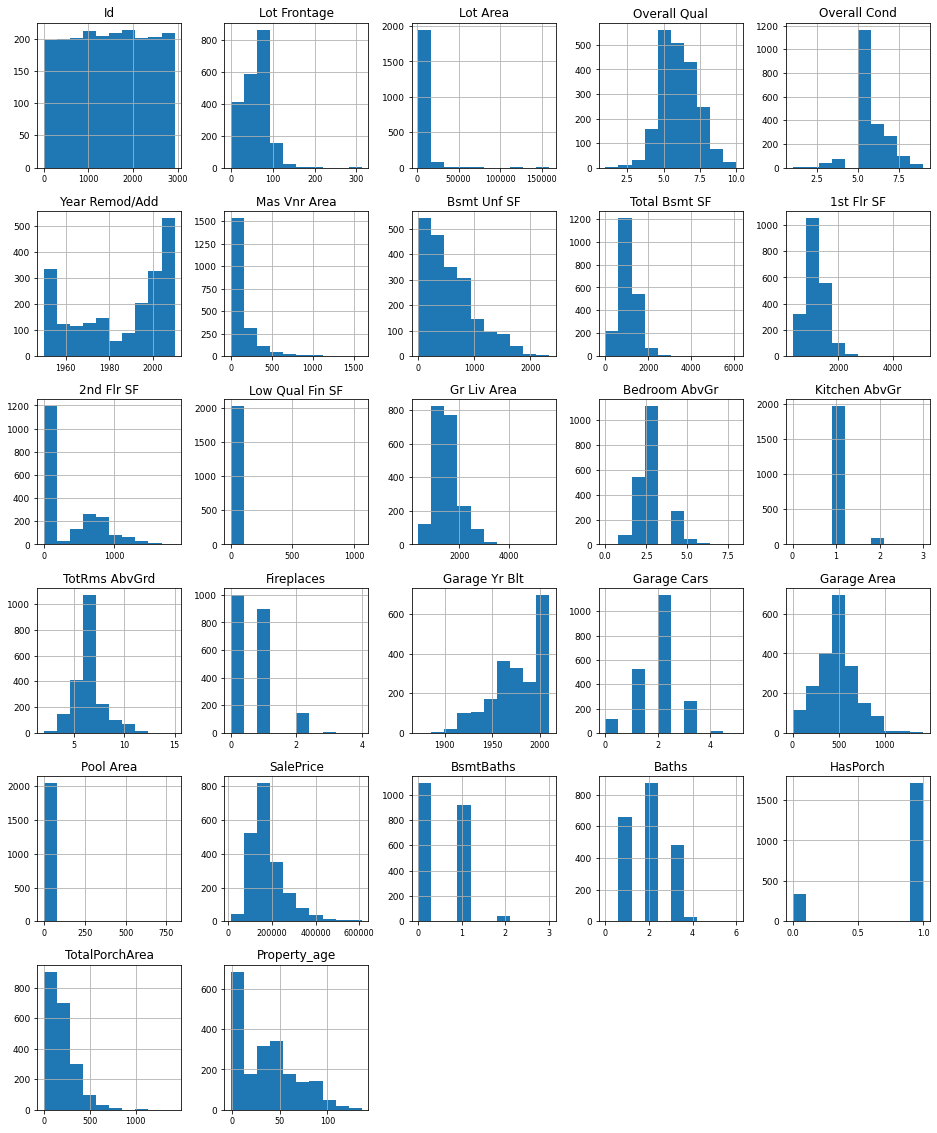

In [11]:
#Distributions of different variables
#Some of the variables are not normally distributed
train_df.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize = 9);

# Correlation

In [12]:
#Lets find correlation of variables with Saleprice
correlation = train_df.corr()[['SalePrice']].sort_values('SalePrice')


The correlation heatmap below shows the ten features that have the highest correlation coefficient with SalePrice. These include categorical features as well as the features were first dummy-encoded. Overall Qual has the highest correlation with saleprice
There are also some collinear features.


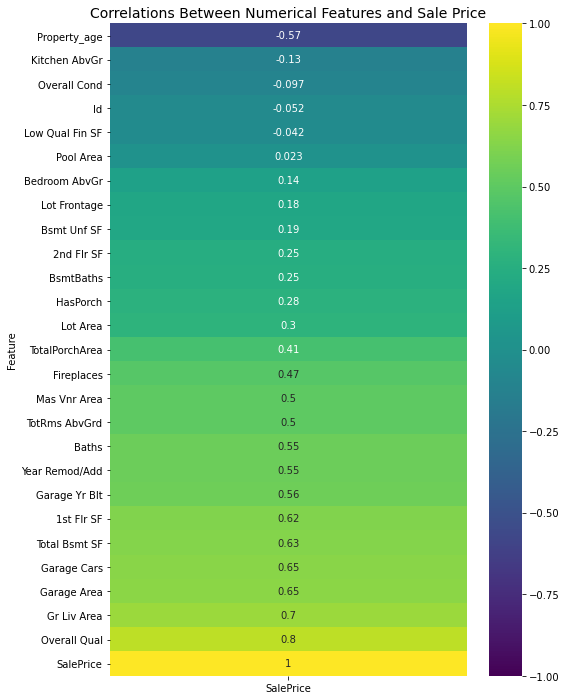

In [13]:
plt.figure(figsize=(8, 12))
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

In [14]:
#One-hot encode categorical columns
train_copy = train_df.copy()
train_dummies = pd.get_dummies(train_copy, drop_first = True)

## Collinear features

## Correlation heatmap (of numerical columns)

  From the heatmap it looks like some of the variables are highly correlated with each other.
  
- Garage Cars and Garage Area (garage area increases with increasing number of cars that can fit in it)

- TotRms AbvGrd and Gr Livarea (area increases with increasing number of rooms)

- 1st Flr Sf and Total Bsmt SF (the first floor is on top of the basement, so they likely to have similar size).

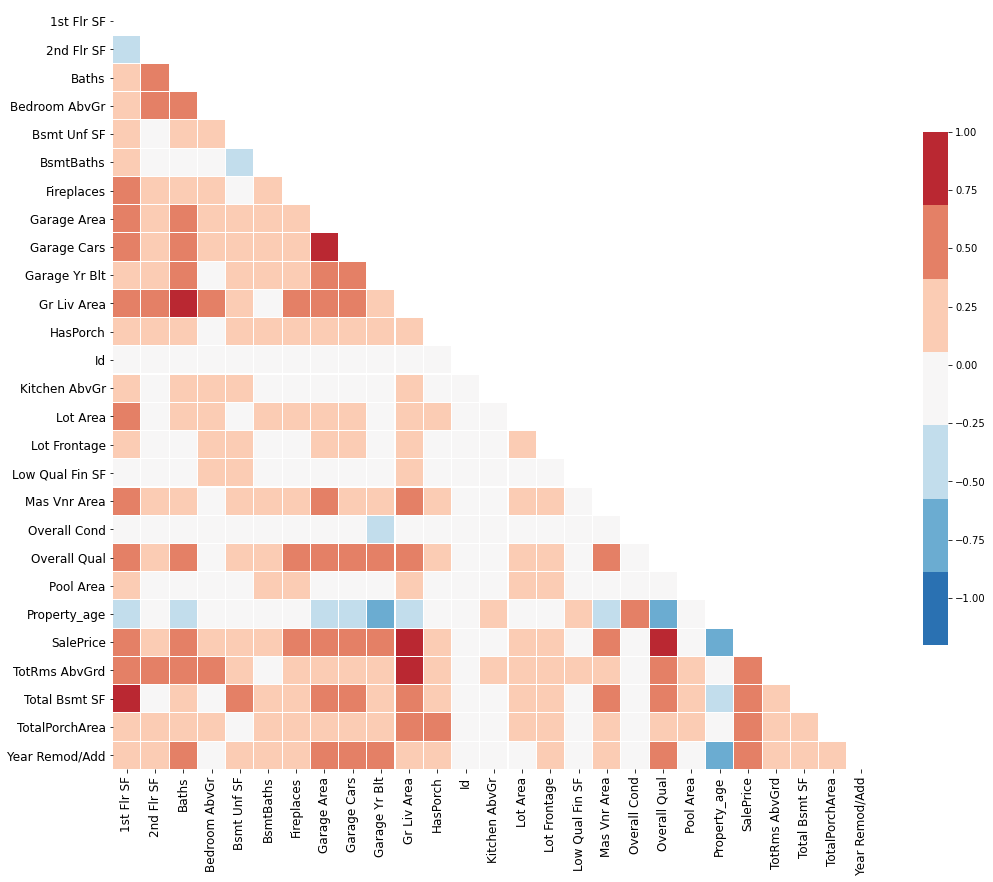

In [15]:
#Order columns
train_copy = train_df[train_df.columns.sort_values()]

#Plot heatmap
mask = np.zeros_like(train_copy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_copy.corr(),
            mask = mask,
            square=True,
            vmin = -1.2,
            vmax = 1,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7))
ax.tick_params(labelsize=12)
plt.tight_layout()

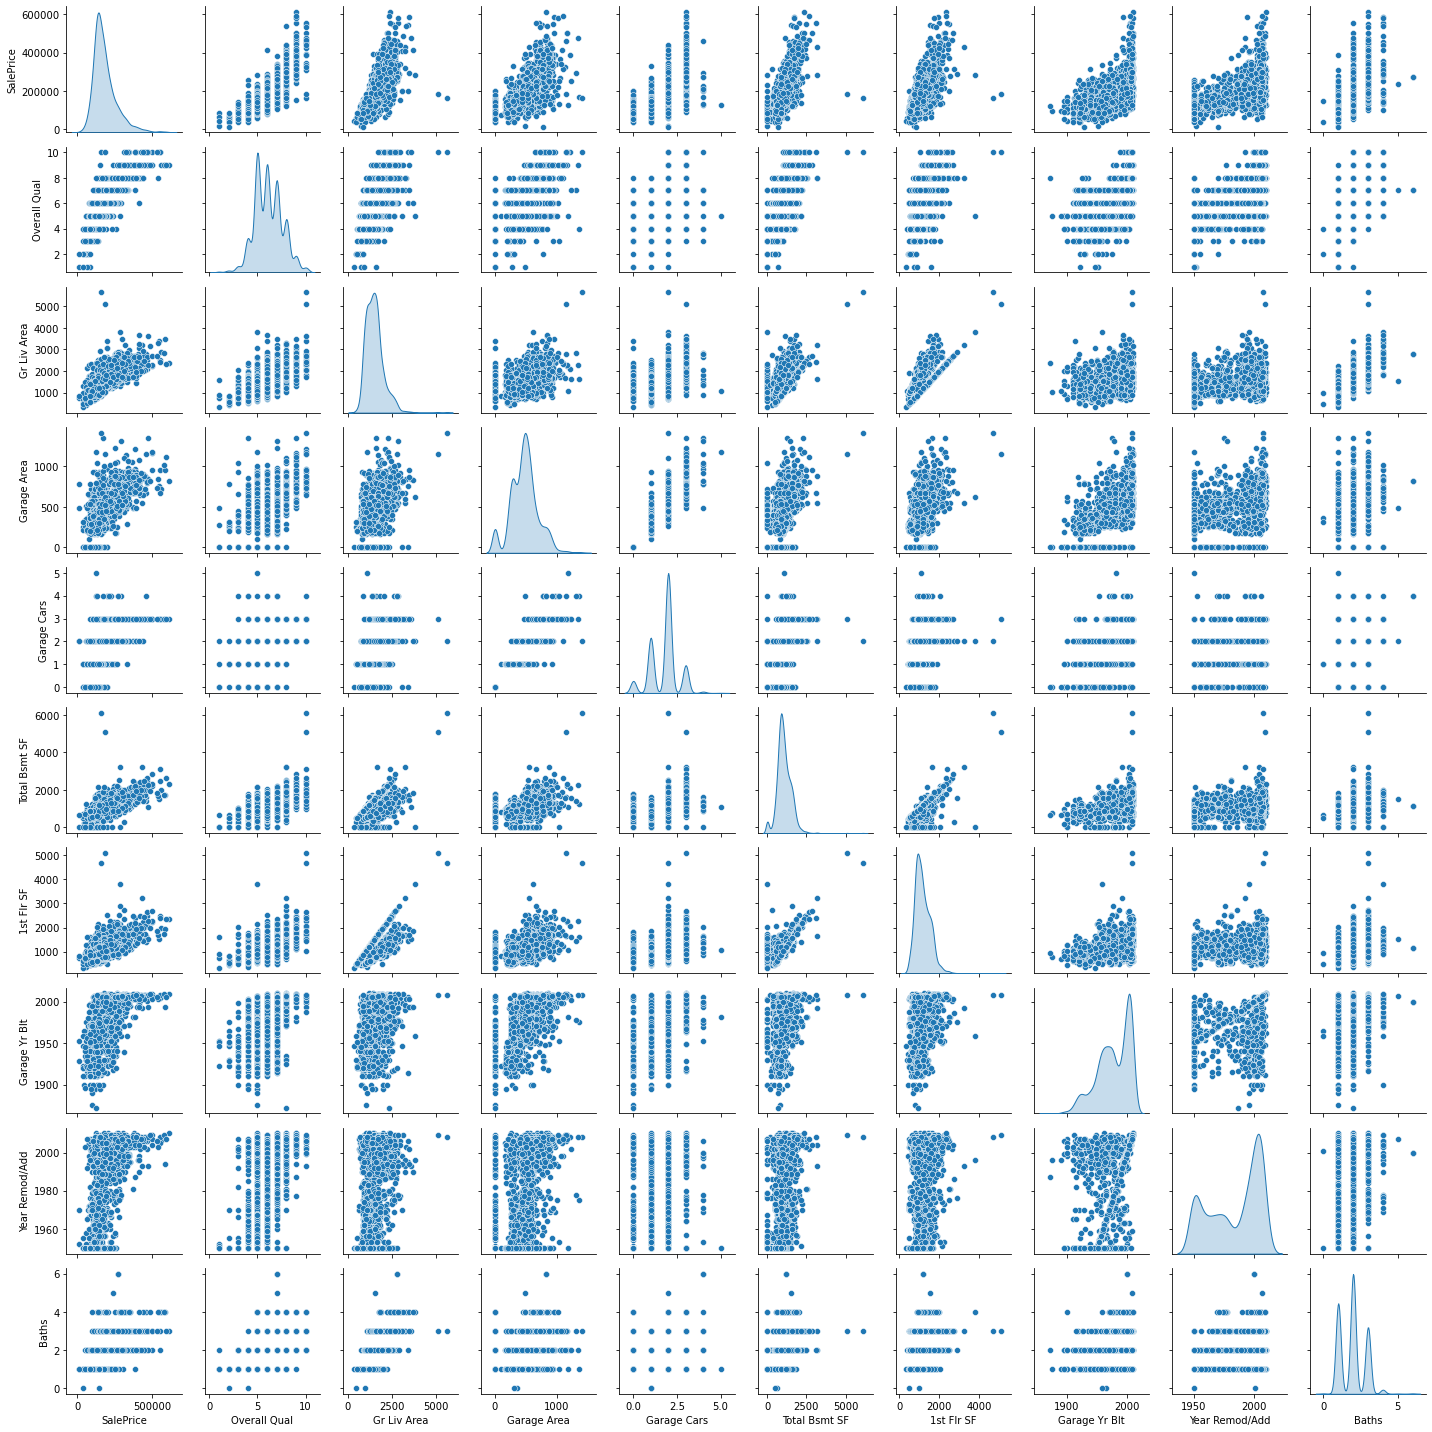

In [16]:
#The pairplots of these 10 features further show their relationship with saleprice, 
#as well as the presence of collinearity (e.g. between 1st Flr SF and Gr Liv Area).

#Get index of columns with 10 highest corrcoef wrt saleprice
train_copy = train_df.copy()
train_dummies = pd.get_dummies(train_copy, drop_first = True)
corr_cols = train_dummies.corr().nlargest(10, 'SalePrice').index
sns.pairplot(train_dummies[corr_cols ],height = 2 ,kind ='scatter',diag_kind='kde')
plt.tight_layout()

# Numerical Variables

In [17]:
#Numerical variables
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  27


In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 11


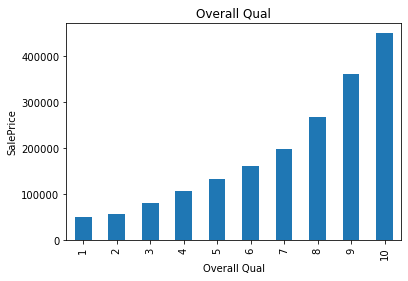

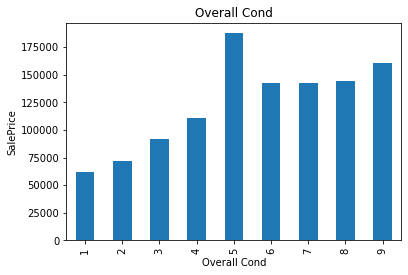

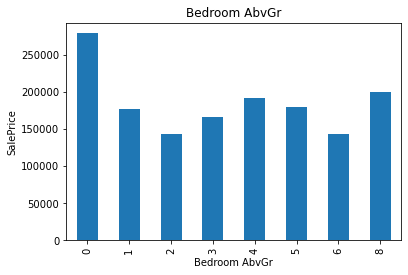

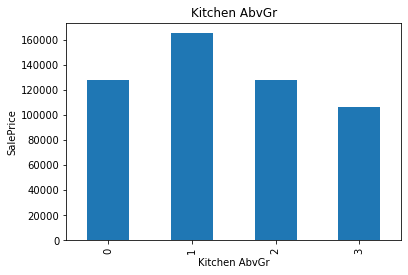

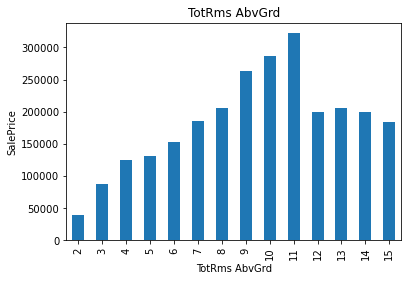

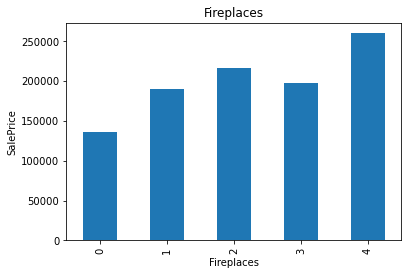

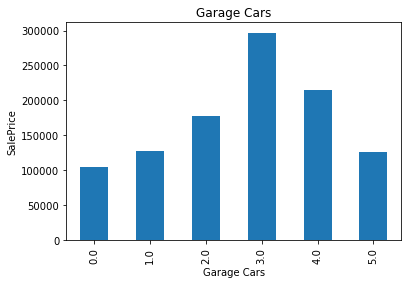

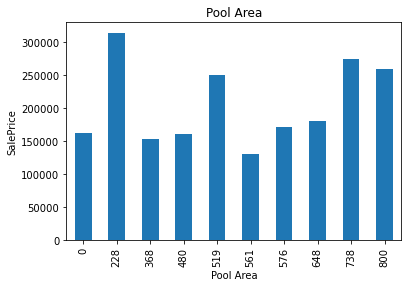

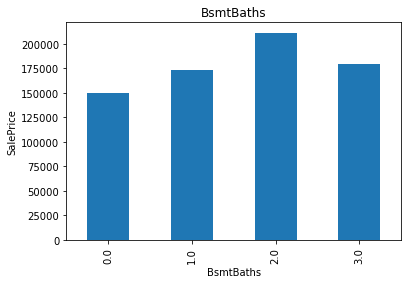

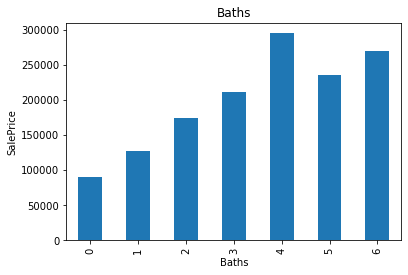

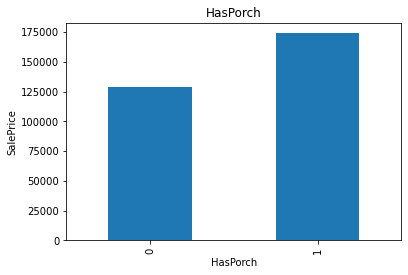

In [19]:
## Lets Find the relationship between Discrete and Sale Price

for feature in discrete_features:
    train_df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

From the plots we could find that when the overall quality is high, Saleprice is also high. Similarly when the total rooms above ground(TotRms ABv GRd) is more, the saleprice is also high. Whereas it does not show much difference when the house is much big with more rooms.
Same is the case for Garage cars, Baths, Bsmt Baths. Houses with Porch also has high Saleprice.


In [20]:
#Continuous Variables
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Id']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 15


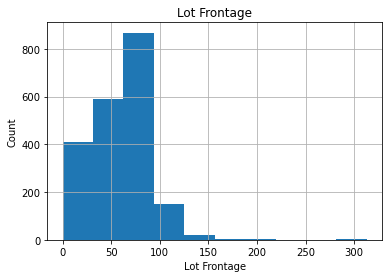

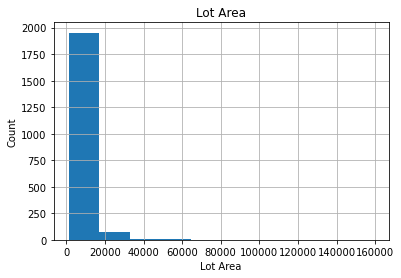

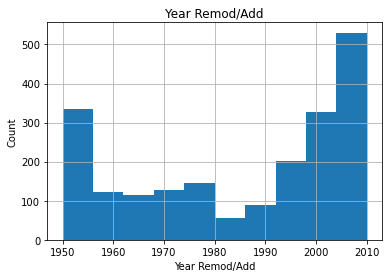

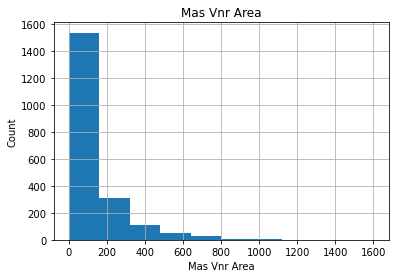

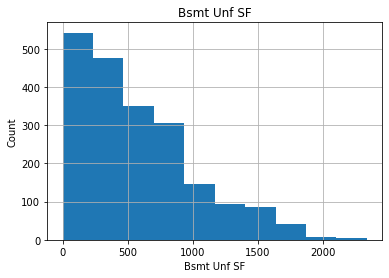

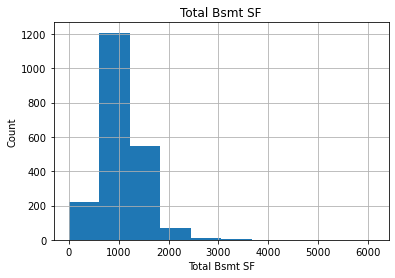

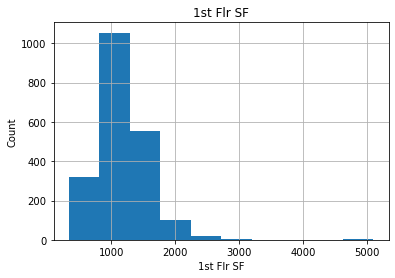

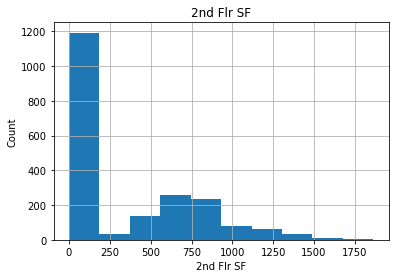

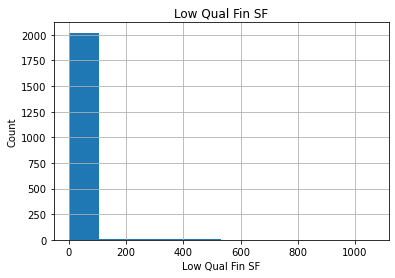

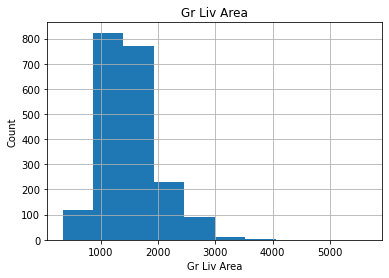

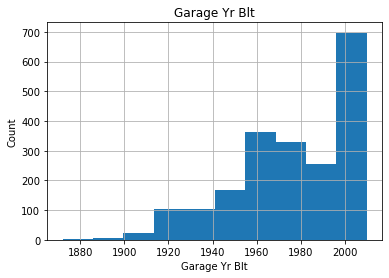

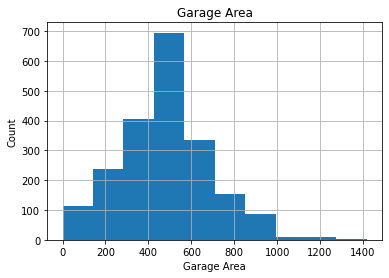

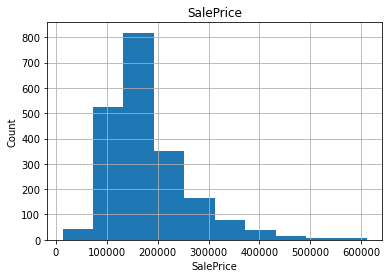

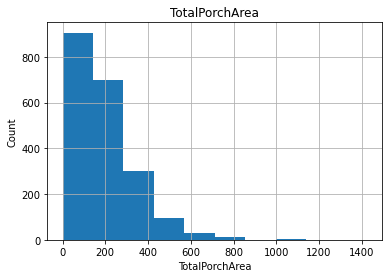

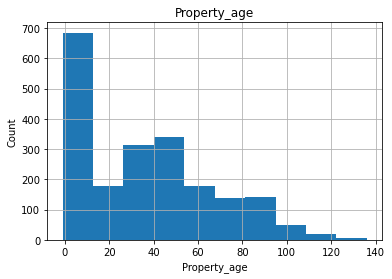

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    train_df[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Most of the continuous variables are not normally distributed.

# Categorical variables

In [22]:
#Select target variable
sp= train_df['SalePrice']

In [23]:
#Select predictors
train_df = train_df.drop(['SalePrice'], axis=1)

In [24]:
# Create a list of categorical columns for train dataset
categorical_features = train_df.select_dtypes(include = [np.object])
categorical_features.columns
 

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [25]:
#list of categorical variables to be encoded
cat_values =['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type']

In [26]:
# Check length of cat_values
len(cat_values)

36

<!-- 'BsmtFinType1','BsmtFinType2','SaleCondition'
cat_values= ['FireplaceQu','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'] -->

In [27]:
#Encode the train_df categorical variables
train_df = pd.get_dummies(train_df, cat_values,drop_first = True)                       

In [28]:
train_df.describe()

,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Pool Area,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000

In [29]:
test_df.describe()

,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Pool Area,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.0,879.000000,879.000000
mean,1445.588168,56.955631,10340.920364,6.054608,5.565415,1984.444824,106.861206,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,2.879408,1.047782,6.459613,0.618885,1975.277588,1.744027,470.832765,1.882821,0.496018,1.940842,0.0,184.424346,37.291240
std,850.717105,34.338680,10047.335167,1.374756,1.128422,20.454546,188.284115,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.830249,0.223844,1.603071,0.669313,26.764481,0.751162,213.070155,29.899698,0.543900,0.818997,0.0,165.411893,30.477921
min,2.000000,0.000000,1477.000000,2.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,3.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,692.500000,40.000000,7298.500000,5.000000,5.000000,1967.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,2.000000,1.000000,5.000000,0.000000,1958.500000,1.000000,323.000000,0.000000,0.000000,1.000000,0.0,35.000000,8.000000
50%,1435.000000,60.000000,9453.000000,6.000000,5.000000,1992.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,473.000000,0.000000,0.000000,2.000000,0.0,167.000000,36.000000
75%,2197.000000,78.500000,11606.500000,7.000000,6.000000,2003.000000,173.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,0.000000,1.000000,3.000000,0.0,282.000000,54.500000
max,2928.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,1378.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,555.000000,2.000000,6.000000,0.0,990.000000,129.000000


In [30]:
# Create a list of categorical columns for test dataset
categorical_features2 = test_df.select_dtypes(include = [np.object])
categorical_features2.columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [31]:
#list of categorical variables to be encoded
cat_values2 =['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type']

In [32]:
#Encode the test_df categorical variables
test_df = pd.get_dummies(test_df, cat_values2 , drop_first =True)

In [33]:
#Preview the columns
display(train_df.head())
display(test_df.head())

,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Pool Area,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,0.0,13517,6,8,2005,289.0,192.0,725.0,725,754,0,1479,3,1,6,0,1976.0,2.0,475.0,0,0.0,3,1,44,34,0,0,0,0,0,0,0

,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Pool Area,BsmtBaths,Baths,HasPorch,TotalPorchArea,Property_age,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,69.0,9142,6,8,1950,0.0,1020,1020,908,1020,0,1928,4,2,9,0,1910.0,1,440,0,0,2,0,60.0,96,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,

There is a differnce between features in the training data set and the test dataset. Therefore will drop the features that are not present in both sets

In [34]:
#creating a list of train_df features
train_list = train_df.columns.to_list()

In [35]:
#creating a list of test_df features
test_list = test_df.columns.to_list()

In [36]:
#creating a list of missing features present in train set
missing_features = set(train_list) - set(test_list)
missing_features

{'Bsmt Cond_Fa',
 'Bsmt Cond_Po',
 'Condition 2_Feedr',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Electrical_Mix',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Heating QC_Po',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_C (all)',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_CompShg',
 'Roof Matl_Membran',
 'Utilities_NoSeWa'}

In [37]:
#creating a list of missing features present in test set
missing_features2 = set(test_list) - set(train_list)
missing_features2

{'Electrical_FuseA',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_GasA',
 'Kitchen Qual_Po',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [38]:
#Drop the missing features in train dataset
train_df = train_df.drop(missing_features, axis=1)

In [39]:
#Drop the missing features in test dataset
test_df = test_df.drop(missing_features2,axis =1)

In [40]:
print(train_df.shape)
print(test_df.shape)

(2050, 210)
(879, 210)


# Train-test-split training data

In [41]:
# Split the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df,sp,test_size = 0.25,random_state = 0)

In [42]:
# Make RMSE the scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_train(model):
    return np.sqrt(-cross_val_score(model, X_train, y_train, scoring=scorer, cv=10))

def rmse_test(model):
    return np.sqrt(-cross_val_score(model, X_test, y_test, scoring=scorer, cv=10))

## Linear Regression Without Regularization

In [43]:
# Initialize Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [44]:
# What is RMSE for both training and test set?
print("Training set RMSE is: " +str(rmse_train(lr).mean())) 
print("Test set RMSE is: "+str(rmse_test(lr).mean()))

Training set RMSE is: 27522.754960975737
Test set RMSE is: 50003.65993137502


In [45]:
# Create a function to calculate adjusted R-squared
def adj_rsquared(rsquared, train_df):
    n = train_df.shape[0]
    p = train_df.shape[1]
    a = ((1-rsquared)*(n-1))/(n-p-1)
    return 1 - a

In [46]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [47]:
r2_test

-20627951.607455164

In [48]:
adj_rsquared(r2_test, train_df)

-22983509.00145494

<AxesSubplot:title={'center':'Linear Reg Coeffs'}>

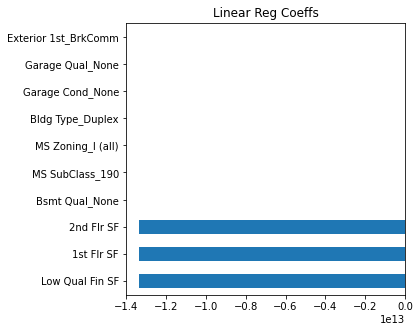

In [49]:
# Which coefficients were most important in predicting SalePrice?
coef = pd.Series(lr.coef_,index=X_test.columns).sort_values()[0:10]
coef.plot(kind="barh", title = "Linear Reg Coeffs", figsize=(5, 5))
#Linear regression identified Low Qual Fin SF, 1st Floor SF and 2nd Floor SF as best predictors. 

<AxesSubplot:title={'center':'Linear Reg Coeffs'}>

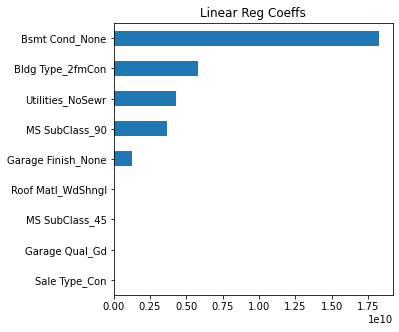

In [50]:
# Which coefficients were most important in predicting Sales Price?
coef = pd.Series(lr.coef_,index=X_test.columns).sort_values()[-10:-1]
coef.plot(kind="barh", title = "Linear Reg Coeffs", figsize=(5, 5))

# Scaling

In [51]:
#Scale the data using StandardScaler
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)
test_df_scaled = ss.transform(test_df)

In [52]:
#Create alpha range
alphas = np.logspace(-1,2,4)
alphas

array([  0.1,   1. ,  10. , 100. ])

# Lasso 

In [53]:
# Find an optimal value for lasso regression alpha using LassoCV
optimal_lasso = LassoCV(alphas=alphas, cv=10)
optimal_lasso.fit(X_train_scale, y_train)

print(optimal_lasso.alpha_)

100.0


In [54]:
#Fit lasso model with the optimal alpha
lasso= Lasso(alpha=optimal_lasso.alpha_).fit(X_train,y_train)
print("Train score:", lasso.score(X_train,y_train), "\nTest Score:", lasso.score(X_test,y_test))
print("Number of features used:{}".format(np.sum(lasso.coef_ !=0)))

Train score: 0.9054233238198289 
Test Score: 0.8213024232323648
Number of features used:91


In [55]:
#Predict the test values
y_train_lass = lasso.predict(X_train)
y_test_lass = lasso.predict(X_test)

In [56]:
lasso.coef_

array([-2.17340363e-01,  3.91728526e+01,  5.90177031e-01,  9.42818023e+03,
        5.49128738e+03,  1.48287140e+02,  1.17629576e+01, -1.48470087e+01,
        3.27309135e+01,  2.99393545e+01,  4.22133261e+01,  3.09325299e+01,
        8.11577410e+00, -1.45352373e+03, -1.20519933e+04,  0.00000000e+00,
        6.66649240e+03,  5.84374395e+01,  1.15691301e+03,  2.42308428e+01,
        1.56178423e+01,  1.40729484e+03,  2.76155296e+03, -4.28853788e+02,
        1.32892471e+01, -3.47294685e+02, -4.62748324e+03,  0.00000000e+00,
       -0.00000000e+00,  4.46341650e+03,  2.38101239e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.28285035e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.74054407e+02,  0.00000000e+00,  1.45151100e+03, -0.00000000e+00,
       -1.63560238e+03,  1.58634604e+04,  0.00000000e+00,  7.86992018e+03,
        0.00000000e+00,  

In [57]:
# Get lasso coefficients
lasso.fit(X_train_scale, y_train)

lasso_coefs = pd.DataFrame({'variable':train_df.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)

,variable,coef,abs_coef
12,Gr Liv Area,19184.409063,19184.409063
175,Kitchen Qual_Gd,-13412.598310,13412.598310
176,Kitchen Qual_TA,-13407.536603,13407.536603
8,Total Bsmt SF,13093.100822,13093.100822
143,Exter Qual_TA,-10817.483046,10817.483046
3,Overall Qual,10274.961008,10274.961008
25,Property_age,-10118.193599,10118.193599
75,Neighborhood_NridgHt,8070.236819,8070.236819
142,Exter Qual_Gd,-7975.772162,7975.772162
154,Bsmt Qual_Gd,-7195.448910,7195.448910


<AxesSubplot:>

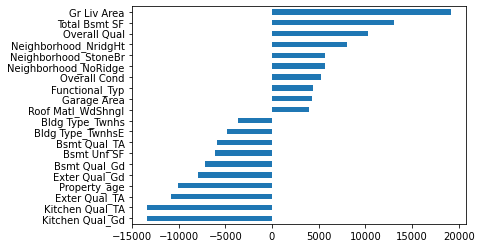

In [58]:
# What are the important coefficients?
coefs_lasso = pd.Series(lasso.coef_, index = X_train.columns)
import_coefs_lasso = pd.concat([coefs_lasso.sort_values().head(10), coefs_lasso.sort_values().tail(10)])
import_coefs_lasso.plot(kind='barh')

In [59]:
#Eliminated features
coefs_lasso[coefs_lasso == 0]

1st Flr SF              0.0
TotRms AbvGrd           0.0
MS SubClass_180         0.0
MS SubClass_190        -0.0
MS SubClass_60         -0.0
MS SubClass_85          0.0
MS Zoning_RL           -0.0
MS Zoning_RM            0.0
Neighborhood_Blueste    0.0
Neighborhood_BrkSide   -0.0
Neighborhood_CollgCr   -0.0
Neighborhood_Greens     0.0
Neighborhood_MeadowV   -0.0
Neighborhood_Veenker    0.0
Bldg Type_2fmCon       -0.0
House Style_1.5Unf     -0.0
House Style_2.5Fin     -0.0
House Style_SLvl       -0.0
Exterior 1st_CemntBd   -0.0
Exterior 1st_MetalSd    0.0
Exterior 1st_VinylSd    0.0
Exterior 2nd_Brk Cmn    0.0
Exterior 2nd_CBlock     0.0
Exterior 2nd_CmentBd   -0.0
Exterior 2nd_MetalSd    0.0
Exterior 2nd_Stucco    -0.0
Exterior 2nd_Wd Shng   -0.0
Mas Vnr Type_None       0.0
Exter Cond_TA          -0.0
Foundation_CBlock      -0.0
Bsmt Qual_None         -0.0
Bsmt Cond_None         -0.0
Bsmt Exposure_None     -0.0
Heating QC_Gd          -0.0
Electrical_FuseF        0.0
Electrical_FuseP    

In [60]:
#Selected features
coefs_lasso[coefs_lasso != 0]

Id                  -250.295950
Lot Frontage         728.997650
Lot Area            2462.092062
Overall Qual       10274.961008
Overall Cond        5286.789653
                       ...     
Sale Type_ConLI     -231.567547
Sale Type_ConLw       49.218612
Sale Type_New       2457.374262
Sale Type_Oth        845.733004
Sale Type_WD         562.156572
Length: 167, dtype: float64

In [61]:
print("Number of features used:{}".format(np.sum(lasso.coef_ !=0)))

Number of features used:167


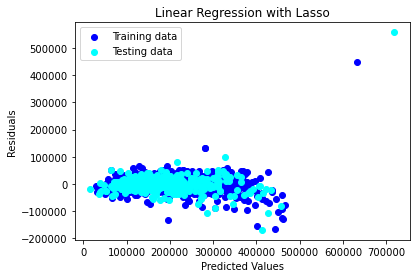

In [62]:
# What do residuals look like?
plt.scatter(y_train_lass, (y_train_lass - y_train), c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_lass, (y_test_lass - y_test), c = "cyan", marker = "o", label = "Testing data")
plt.title("Linear Regression with Lasso")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()


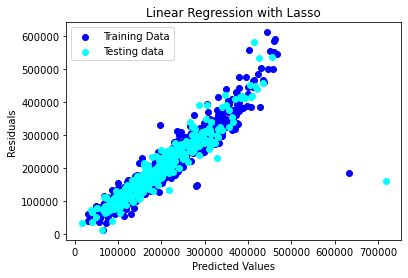

In [63]:
# How does prediction compare to actual data?
plt.scatter(y_train_lass, y_train, c = "blue", marker = "o", label = "Training Data")
plt.scatter(y_test_lass, y_test, c = "cyan", marker = "o", label = "Testing data")
plt.title("Linear Regression with Lasso")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

In [64]:
y_pred_lass = lasso.predict(X_test_scale)

In [65]:
# What is RMSE for both training and test set?
print("Training set RMSE is: " +str(rmse_train(lasso).mean())) 
print("Test set RMSE is: "+str(rmse_test(lasso).mean()))

Training set RMSE is: 26182.11781564651
Test set RMSE is: 44591.508473284906


In [66]:
r2_score(y_test, y_pred_lass )

0.8314026735268396

In [67]:
adj_rsquared(r2_score(y_test, y_pred_lass), train_df)

0.8121501240111443

In [68]:
mean_squared_error(y_test, y_pred_lass)

1061645776.7665186

In [69]:
y_pred_lass

array([ 24806.24958042, 101434.52416649, 173929.89656346, 149444.81595936,
        83054.89593148, 116800.29528673, 371960.36340595, 172294.90411419,
        93460.38784098, 160699.63777528, 148872.71551368, 120541.76480741,
       271801.11513748, 211426.37675371, 209685.01941702, 116882.82860258,
       143646.31897103, 250069.70243063, 219887.79312806, 147868.43134786,
       223763.41392607, 211148.6056968 , 411779.20146103, 152068.70880394,
       193380.36406382, 134893.65462552, 138526.76337336, 216328.44084247,
        95604.24720346, 146448.98269342, 214966.21598921, 192609.55196425,
       215779.06052751, 175376.73101943, 181931.92661625, 141408.74013893,
       313517.52672537, 225323.70423991, 140552.06533902, 309523.27787507,
       140505.75327102, 175625.09521129, 145245.42167553, 236641.39858897,
       187584.81754686, 152295.29462161, 180980.73993712, 205367.91885754,
       136301.93897081, 277657.82155874,  97117.61834234, 134688.3662704 ,
       255075.76959066, 1

# Ridge Regularisation

In [70]:
# Find an optimal value for Ridge regression alpha using RidgeCV
optimal_ridge = RidgeCV(alphas=alphas, cv=10)
optimal_ridge.fit(X_train_scale, y_train)

print(optimal_ridge.alpha_)

100.0


In [71]:
#Fit Ridge model with the optimal alpha
ridge= Ridge(alpha=optimal_ridge.alpha_).fit(X_train,y_train)
print("Train score:", ridge.score(X_train,y_train), "\nTest Score:", ridge.score(X_test,y_test))
print("Number of features used:{}".format(np.sum(ridge.coef_ !=0)))

Train score: 0.8886515802940043 
Test Score: 0.7885985108968683
Number of features used:210


In [72]:
#Predict the test values
y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)

In [73]:
ridge.fit(X_train_scale, y_train)

Ridge(alpha=100.0)

In [74]:
ridge.score(X_train_scale, y_train)

0.9118700960304337

In [75]:
ridge.score(X_test_scale, y_test)

0.8395008744699627

In [76]:
pred = ridge.predict(X_test_scale)

In [77]:
y_pred_ridge = ridge.predict(X_test_scale)

In [78]:
r2_score(y_test, y_pred_ridge )

0.8395008744699627

In [79]:
adj_rsquared(r2_score(y_test, y_pred_ridge), train_df)

0.821173078732438

In [80]:
pred

array([ 28328.2105442 , 102529.46258369, 178169.58394881, 160008.96820142,
        83804.34870436, 113321.09211083, 370039.76962434, 175980.10259107,
        89084.71109378, 161588.32474076, 156253.3792827 , 124001.87501096,
       277765.55905975, 211533.94490375, 208258.28932139, 121581.27324152,
       143114.11703492, 250536.66465922, 215721.11933315, 147507.14637511,
       224457.4194123 , 211276.23795653, 409119.7704705 , 151721.97138999,
       197861.97416495, 135803.44343316, 133810.25638214, 216745.08562536,
        96526.63466659, 152228.88758949, 212728.08383655, 191432.09342947,
       220848.47972651, 175196.22361001, 183432.20939218, 139500.07859403,
       311854.02685913, 225738.96073276, 137392.55487301, 304875.56675911,
       137886.51129007, 176806.58767352, 142448.29341441, 230087.2983849 ,
       187919.96579878, 154226.5937154 , 167516.45982656, 207808.0368053 ,
       137614.9526771 , 281789.45870995,  93811.09470846, 129908.67401957,
       256539.0666403 , 1

In [81]:
# Get ridge coefficients
ridge.fit(X_train_scale, y_train)

ridge_coefs = pd.DataFrame({'variable':train_df.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
12,Gr Liv Area,10724.367088,10724.367088
3,Overall Qual,10423.487729,10423.487729
8,Total Bsmt SF,10141.969743,10141.969743
175,Kitchen Qual_Gd,-9432.575582,9432.575582
176,Kitchen Qual_TA,-8974.994156,8974.994156
75,Neighborhood_NridgHt,7593.723275,7593.723275
143,Exter Qual_TA,-7291.092607,7291.092607
25,Property_age,-6718.882972,6718.882972
154,Bsmt Qual_Gd,-6660.556980,6660.556980
10,2nd Flr SF,6596.039556,6596.039556


<AxesSubplot:>

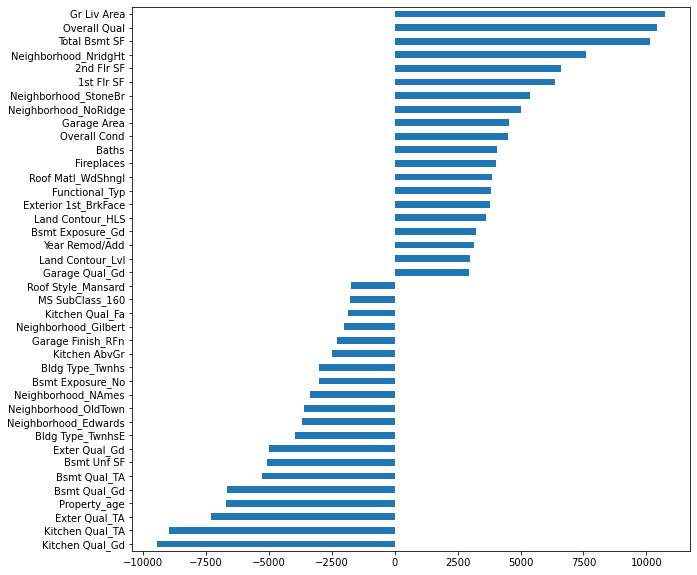

In [82]:
# What are the coefficients with most weight?
coefs = pd.Series(ridge.coef_, index=X_train.columns)
import_coefs = pd.concat([coefs.sort_values().head(20), coefs.sort_values().tail(20)])
import_coefs.plot(kind='barh', figsize=(10, 10))

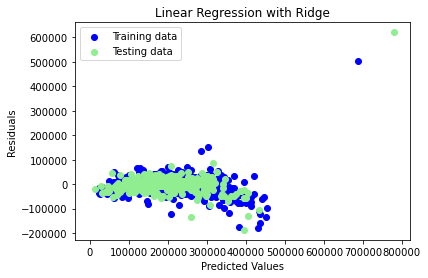

In [83]:
# What do residuals look like?
plt.scatter(y_train_ridge, (y_train_ridge - y_train), c="blue", marker="o", label = "Training data")
plt.scatter(y_test_ridge, (y_test_ridge - y_test), c="lightgreen", marker="o", label = "Testing data")
plt.title("Linear Regression with Ridge")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

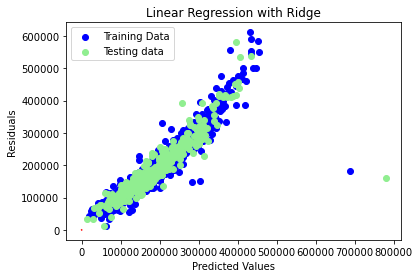

In [84]:
# How does prediction compare to actual data?
plt.scatter(y_train_ridge, y_train, c="blue", marker="o", label="Training Data")
plt.scatter(y_test_ridge, (y_test), c="lightgreen", marker="o", label = "Testing data")
plt.title("Linear Regression with Ridge")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], color = "red")
plt.show()


In [85]:
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

Ridge picked 210 features and eliminated the other 0 features


In [86]:
ridge.predict(test_df_scaled)

array([135754.19779784, 152918.85041399, 213231.33225061, 110699.4582661 ,
       171574.27628917,  84599.97448712, 105011.3940514 , 156966.25722787,
       173869.15549999, 181148.95203667, 139085.7810139 , 127034.74652795,
       138787.69450921, 285913.66026846, 126709.75110663, 136562.33461319,
       169309.90245431, 115584.31185452, 205147.43084664, 168771.63932228,
       160817.78349178, 132625.53169079, 181015.27414581, 181310.99984193,
       180190.65785964, 128696.52743659, 122631.53109816, 121094.94230736,
       164953.05859853,  69112.21016789, 102530.89595751,  96717.54883509,
       199157.65564623, 160066.09397686, 204148.60760264, 177795.91458365,
       125781.67790659, 103214.7046719 , 125530.13088444, 203501.67685136,
       165876.40232705, 199715.5572374 , 149157.0879303 , 157582.45224942,
       210042.88990328, 100350.76026047, 214895.69674711, 133389.95434114,
       133009.44239607, 119117.87574892, 101256.07168529, 202981.42671139,
       236811.33164334, 1

In [87]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')


In [88]:
# In order to balance bias and variance, the L1 penalty score had to be set to 5000. 
# This reduced the number of features in the model to just 17. 
# The training R2 was able to explain 82.9% of variation in Sale Price, and the testing R2 is able to explain 71.6%.
# To improve this model, I would likely manually remove features that have been assigned 0 coefficients at 
# various stages in the process and rerun the LassoCV until the model is no longer overfit to the training data.

lasso2 = Lasso(alpha = 5000, max_iter = 4000)
lasso2.fit(X_train, y_train);


In [89]:
display_R2_scores(lasso2, X_train, y_train, X_test, y_test)
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The mean cross validation score for this model is 0.8095.
The training score for this model is 0.8287.
The testing score for this model is 0.7158.
The number of features in this model is : 167.


In [90]:
y_train_lass = lasso2.predict(X_train)
y_test_lass = lasso2.predict(X_test)

In [91]:
rmse_test(lasso).mean()

44591.508473284906

In [92]:
lasso2.coef_

array([-7.17168544e-01,  1.28011308e+02,  6.64288021e-01,  1.19701085e+04,
        0.00000000e+00,  4.38100058e+02,  3.57689419e+01, -2.03985458e+01,
        3.97573916e+01,  4.47566546e+01,  3.87355684e+01,  1.87902922e+01,
        9.04237199e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.10392939e-01,  0.00000000e+00,  4.22392108e+01,
       -1.07485692e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.38546450e+01, -2.93680581e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [93]:
lasso2_coef = pd.DataFrame(lasso2.coef_, X_train.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [94]:
#Lasso picked 17 features
lasso2_coef[lasso2_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)

,Coefficient
Overall Qual,11970.108539
Year Remod/Add,438.100058
Lot Frontage,128.011308
1st Flr SF,44.756655
Garage Area,42.239211
Total Bsmt SF,39.757392
2nd Flr SF,38.735568
Mas Vnr Area,35.768942
TotalPorchArea,23.854645
Low Qual Fin SF,18.790292


In [95]:
pred = lasso2.predict(test_df)

In [96]:
pred

array([147871.63950488, 194020.64454032, 199715.20061588, 116632.62993884,
       174972.22293478,  88103.17014235, 111651.13689288, 138559.34006685,
       195963.23022253, 182047.79793636, 165379.39524065, 124021.89741829,
       147686.91498649, 284138.75314786, 157990.40986353, 129125.66333115,
       160034.02894357, 113435.09894344, 221514.54115941, 187677.75634258,
       147351.44955091, 124788.52539754, 214258.04794934, 154932.30700535,
       196044.52106428, 110296.82581092, 129928.05826971, 117820.04998941,
       155914.44124661,  24381.0276577 , 102350.14777177,  84554.06258507,
       237522.59986433, 173691.56770847, 222625.38183146, 187913.109915  ,
       120041.00598135,  61207.76342422, 105395.31746757, 203900.83438346,
       163572.23770875, 196749.81537456, 162202.89216035, 174630.1763698 ,
       224139.49395981, 103297.30861705, 224676.88555069, 125802.54707242,
       132246.68368384, 126091.35749536,  98791.49780968, 200451.41492328,
       252842.04437618, 1

In [97]:
# #Export submission file for kaggle
pred = pd.DataFrame(pred)
sub_df = pd.read_csv('./datasets/sample_sub_reg.csv')
datasets = pd.concat([sub_df['Id'],pred],axis = 1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_sub_reg8.csv', index =False)

In [98]:
rmse_test(lasso2).mean()

44175.606433819725

# Conclusion and Recommendations

Lasso model was the best performing in terms of R2 and MSE.

Square feet area, property age, Overall conditions and location are the most important determinant factors of Saleprice.

Best locations are - Northridge Heights, Stone Brook and Northridge.

People looking to sell should do it sooner rather than later.

To increase the value of a home:
- Renovate the kitchen
- Remodel the interior and exterior finish
- Add fireplace(if not present)
- Renovate Garage
- Renovate house if not in good condition
